# LOAN APPROVAL PREDICTION USING ENSEMBLE LEARNING

### Importing Library Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from csv import reader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold as skf
from sklearn import tree
from sklearn.base import clone
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import VotingClassifier

### Loading dataset using pandas

In [2]:
df = pd.read_csv('datasets/loandata.csv')

In [3]:
df2 = df.copy()

In [4]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Exploratory Data Analysis

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(614, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')

In [11]:
df2 = df.copy()

In [12]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(int)
df['Property_Area'] = df['Property_Area'].map({'Urban':2,'Semiurban':1, 'Rural':0}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(int)
df['Dependents'] = df['Dependents'].astype(int)

In [13]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [14]:
df.shape

(614, 13)

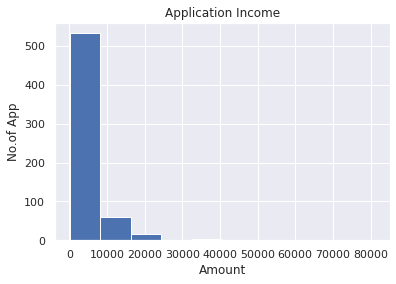

In [15]:
df['ApplicantIncome'].hist(bins=10)
plt.title("Application Income")
plt.xlabel('Amount')
plt.ylabel('No.of App')
plt.show()

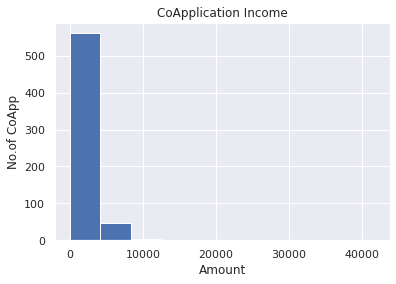

In [16]:
df['CoapplicantIncome'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No.of CoApp')
plt.show()

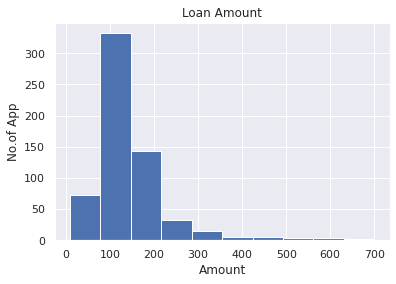

In [17]:
df['LoanAmount'].hist(bins=10) 
plt.title("Loan Amount")
plt.xlabel('Amount')
plt.ylabel('No.of App')
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

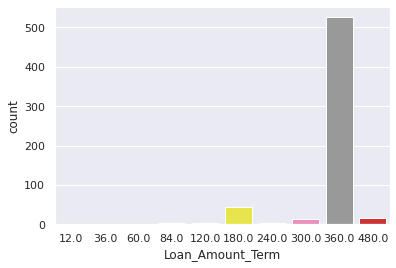

In [18]:
sns.countplot(x='Loan_Amount_Term', data=df2, palette = 'Set1')

<AxesSubplot:xlabel='Credit_History'>

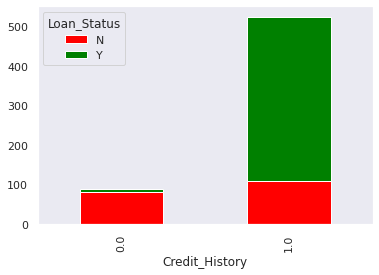

In [19]:
stack_chart = pd.crosstab(df2['Credit_History'], df2['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

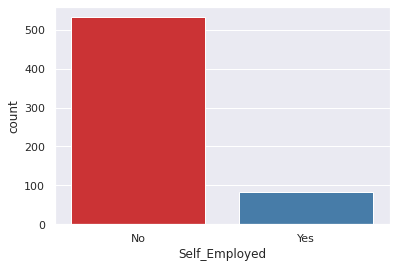

In [20]:
sns.countplot(x='Self_Employed', data=df2, palette = 'Set1')

<AxesSubplot:xlabel='Gender'>

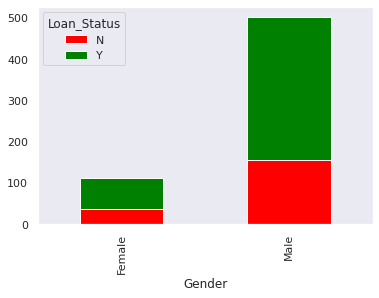

In [21]:
stack_chart = pd.crosstab(df2['Gender'], df2['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

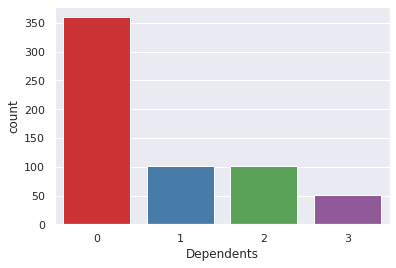

In [22]:
sns.countplot(x='Dependents', data=df2, palette = 'Set1')

<AxesSubplot:xlabel='Married', ylabel='count'>

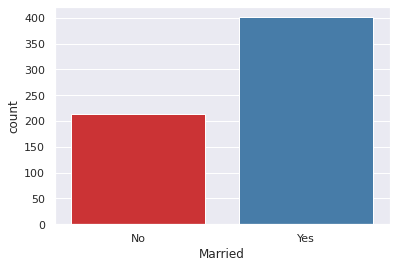

In [23]:
sns.countplot(x='Married', data=df2, palette = 'Set1')

Text(0.5, 0, 'Amount')

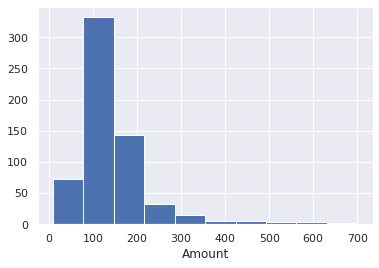

In [24]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanAmount'].hist(bins=10) 
plt.xlabel('Amount')

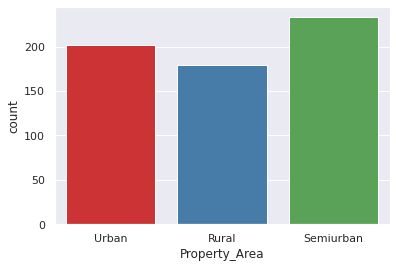

In [25]:
sns.countplot(x="Property_Area", order=['Urban','Rural','Semiurban'], data=df2, palette="Set1")
plt.show()

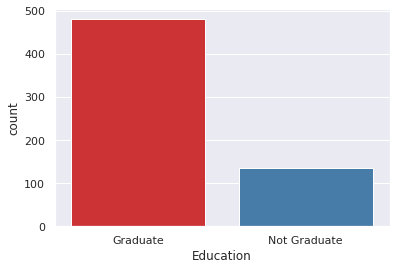

In [26]:
sns.countplot(x="Education", order=['Graduate','Not Graduate'], data=df2, palette="Set1")
plt.show()
df
df.to_csv('newds.csv', index=False)

In [27]:
train=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status'], axis=1)

In [28]:
ttrain = train.copy()

<AxesSubplot:>

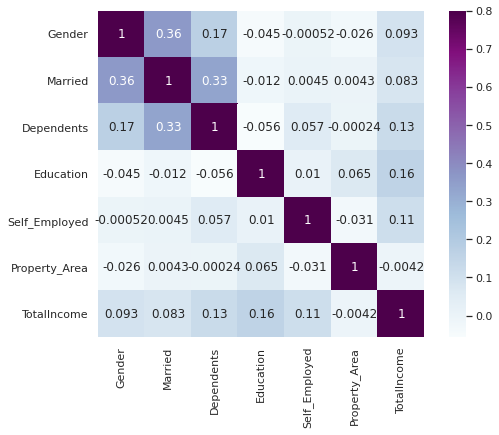

In [29]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [30]:
dtrain= pd.get_dummies(df)
train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [31]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    #print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

/home/shanmukh/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
AUC Score (Train): 0.943733


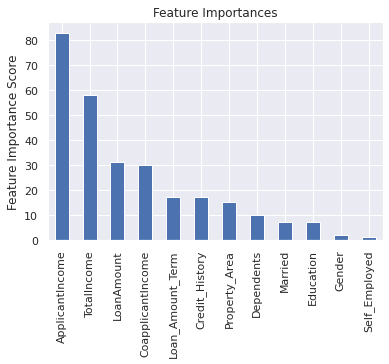

In [32]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)

### Training

In [33]:
X = df.drop(columns=["Loan_ID","Loan_Status"],axis=1)
Y = df["Loan_Status"]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [35]:
#def get_models():
ls=[]
ls.append(['lr',LogisticRegression(max_iter=1000)])
ls.append(['rf',RandomForestClassifier()])
ls.append(['svm', SVC()])
ls.append(['ada', AdaBoostClassifier()])
xgb = XGBClassifier(use_label_encoder=False)

In [36]:
for i in ls:
    i[1].fit(X_train, Y_train)
    y_pred = i[1].predict(X_test)

In [37]:
clf_stack = StackingClassifier(classifiers=[LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC(),AdaBoostClassifier()],meta_classifier=xgb, use_probas=False, use_features_in_secondary=False)

In [38]:
clf_stack.fit(X_train, Y_train)
y_pred = clf_stack.predict(X_test)

[19:34:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
ls.append(['st',clf_stack])

In [43]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
573,1,1,2,0,0,6125,1625.0,187.000000,480.0,1.0,1,7750.0
242,1,0,0,1,0,2965,5701.0,155.000000,60.0,1.0,2,8666.0
423,1,1,1,1,0,7250,1667.0,110.000000,360.0,0.0,2,8917.0
335,1,1,0,1,1,5503,4490.0,70.000000,360.0,1.0,1,9993.0
348,1,1,0,1,0,6333,4583.0,259.000000,360.0,1.0,1,10916.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44,1,1,0,0,1,4695,0.0,96.000000,360.0,1.0,2,4695.0
454,1,0,0,1,1,7085,0.0,84.000000,360.0,1.0,1,7085.0
213,1,1,3,0,1,5703,0.0,130.000000,360.0,1.0,0,5703.0
113,0,0,1,1,1,7451,0.0,146.412162,360.0,1.0,1,7451.0


In [40]:
vot_hard = VotingClassifier(estimators = ls, voting ='hard')
vot_hard.fit(X_train, Y_train)

[19:34:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[['lr', LogisticRegression(max_iter=1000)],
                             ['rf', RandomForestClassifier()], ['svm', SVC()],
                             ['ada', AdaBoostClassifier()],
                             ['st',
                              StackingClassifier(classifiers=[LogisticRegression(max_iter=1000),
                                                              RandomForestClassifier(),
                                                              SVC(),
                                                              AdaBoostClassifier()],
                                                 meta_classifier=XGBClassifier(base_score=None,
                                                                               booster=None,
                                                                               colsample_bylevel=Non...
                                                                               learning_rate=None,
                      

### Prediction and Performance Tuning

In [41]:
Y_pred = vot_hard.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print("Accuracy Score % f" % score)

Accuracy Score  0.837398


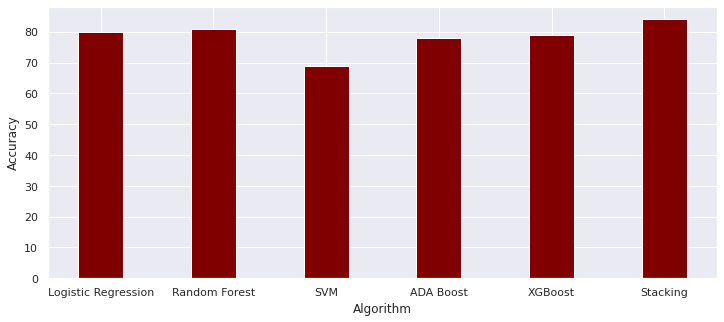

In [42]:
x_val = ['Logistic Regression','Random Forest','SVM','ADA Boost','XGBoost','Stacking']
y_val = [80,81,69,78,79,84]
#80,81,69,78,79,84
fig = plt.figure(figsize=(12, 5))
plt.bar(x_val, y_val, color='maroon', width=0.4)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()